In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from experiment_train import *
from experiment_datasets import *
from helpers import *
import matplotlib

Using TensorFlow backend.


Initialized TensorFlow


In [9]:
def get_W(scale = 1.0, epochs = 15, N = [100, 100]):
    # scaling the architecture up/down
    #N = [int(t * scale) for t in N]
    N = [int(N[0] * scale), N[1]]

    def get_p_arr(p):
        """ p array with failure on the first layer """
        return [0, p]  + [0] * len(N)

    # Lips. coeff
    KLips = 1.

    # activation function
    activation = 'sigmoid'

    # training the network
    exp = MNISTExperiment(N = N, p_inference = get_p_arr(0), p_train = get_p_arr(0), KLips = KLips, epochs = epochs,
                                      activation = activation, reg_type = None, reg_coeff = 0, do_print = 'plot',
                                      name = 'experiment_weights', seed = None, batch_size = 100)
    
    # returning the weights in the middle
    return exp.W[2]

In [10]:
# all scales of the network (up and down)
scales = np.linspace(0.5, 5, 5)

# repetitions for each scale
repetitions = 3

print('Total runs: %d' % (len(scales) * repetitions))

Total runs: 15


In [7]:
def process_scale(s, epochs = 0):
    """ Run many repetitions for one scale """
    return [get_W(scale = s, epochs = epochs) for _ in range(repetitions)]

def process_all(epochs = 0):
    """ Random variable with all results """
    return {scale: process_scale(scale, epochs) for scale in tqdm(scales)}

In [5]:
# obtaining the results
results = process_all()

100%|██████████| 5/5 [00:27<00:00,  5.90s/it]


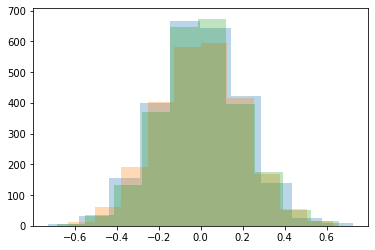

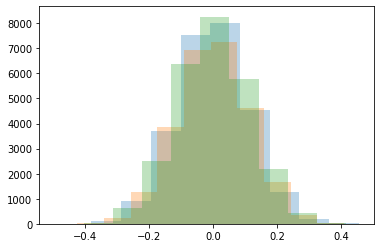

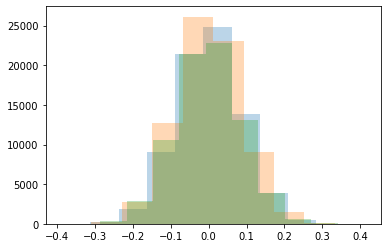

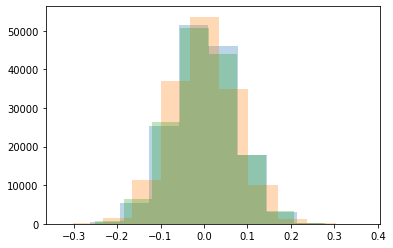

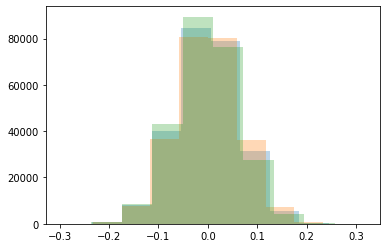

In [51]:
# untrained
for scale in scales:
    plt.figure()
    for i in range(repetitions):
        plt.hist(results[scale][i].flatten(), alpha = 0.3)
    plt.show()


  0%|          | 0/5 [00:00<?, ?it/s]

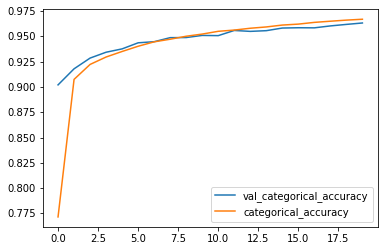

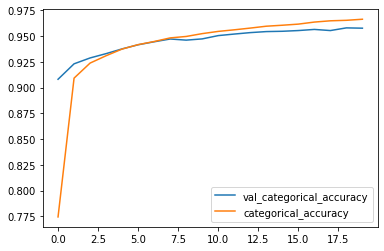

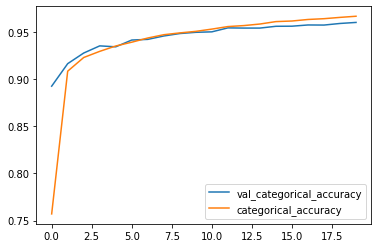


 20%|██        | 1/5 [01:47<07:11, 107.78s/it]

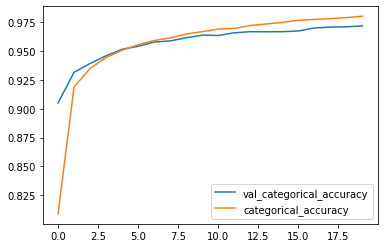

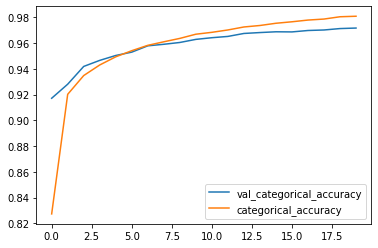

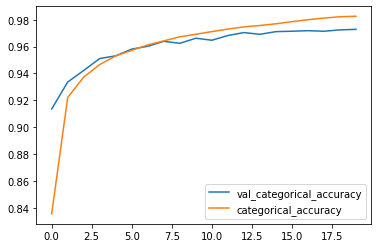


 40%|████      | 2/5 [03:23<05:12, 104.16s/it]

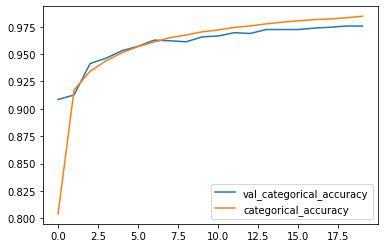

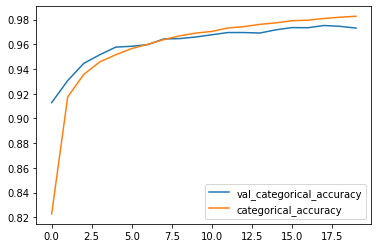

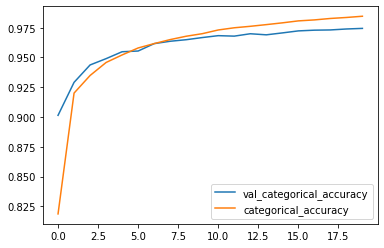


 60%|██████    | 3/5 [05:56<03:57, 118.78s/it]

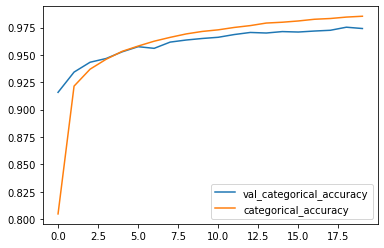

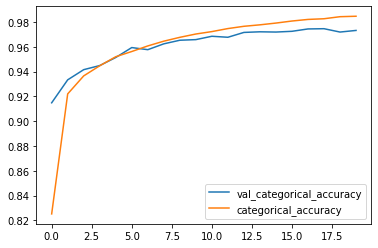

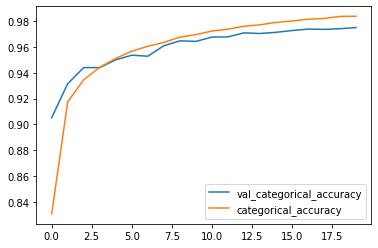


 80%|████████  | 4/5 [08:22<02:07, 127.08s/it]

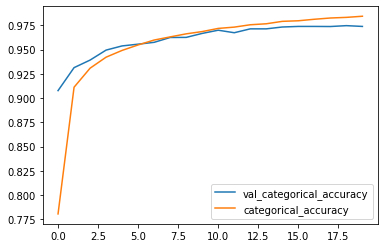

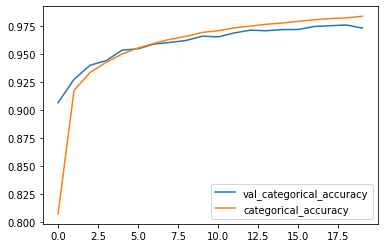

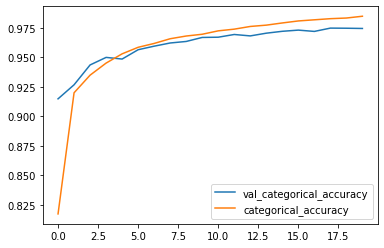


100%|██████████| 5/5 [11:05<00:00, 137.78s/it]

In [11]:
# obtaining the results
results = process_all(epochs = 20)

0.5 0.020243924181934325
0.5 0.020746084546424903
0.5 0.020622813668937034


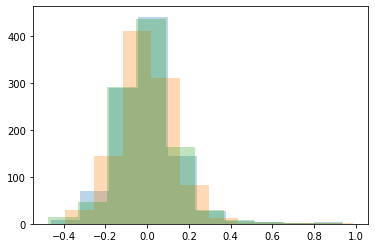

1.625 0.021361667255405337
1.625 0.019928365883764565
1.625 0.02238099794966164


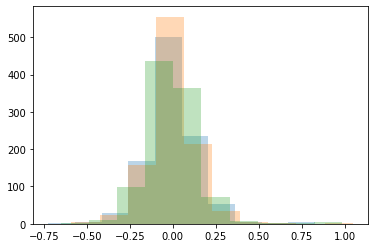

2.75 0.0244170940490831
2.75 0.021458959982961767
2.75 0.021787993223426838


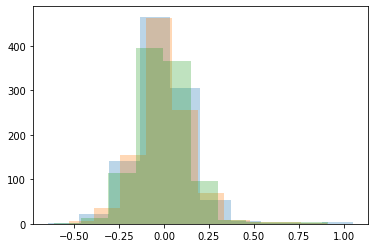

3.875 0.023337274482536863
3.875 0.02280179444552055
3.875 0.0208530041176056


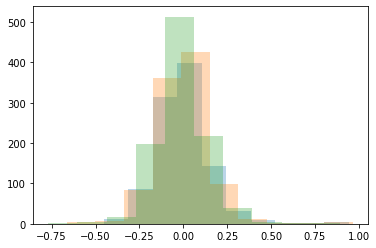

5.0 0.02385864592744391
5.0 0.020618251648230057
5.0 0.021667450529093912


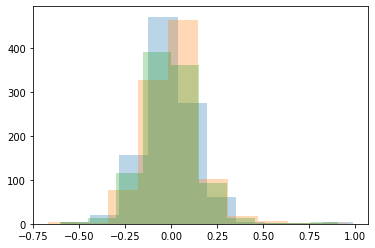

In [13]:
# trained 20 epochs
for scale in scales:
    plt.figure()
    for i in range(repetitions):
        plt.hist(results[scale][i].flatten(), alpha = 0.3)
        print(scale, np.std(results[scale][i].flatten()) ** 2)
    plt.show()

In [ ]:
# Here weights are not decaying so much...
# TODO: add regularizer for continuity and see if results change